<a href="https://colab.research.google.com/github/dionysiadimi/matzaris/blob/main/scRNAseq_analysis_of_BCa_samples_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import scipy

In [3]:
!pip install leidenalg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 30.3 MB/s eta 0:00:00


In [4]:
!pip install louvain scanpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.2/104.2 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 31.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.5 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82808 sha256=fd96dc51204a7d8b5a7210d8ac5d236ba96033d2db424086655f06ff6008aa5c
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8027 sha256=0f0368ad1c1543aba9ac61fbc0cf545be73d02

In [5]:
!pip install kb-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 47.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 MB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.3/53.3 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 66.8 MB/s eta 0:00:00
  Created wheel for kb-python: filename=kb_python-0.27.3-py3-none-any.whl size=7543254 sha256=5bda391b88352f95dc2a60fa6540a90acdbf9cff4067b17874ea57bcd618ee67
  Stored in directory: /root/.cache/pip/wheels/26/dd/ac/5c7b2815c495a350377323872fe9278690083bb1fcc406d5a2
  Created wheel for loompy: filename=loompy-3.0.7-py3-none-any.whl size=52017 sha256=3eaa76435c57548b4978f305bf803e451638e6fa410d62953d1a74b066fab559
  Stored in directory:

In [6]:
!wget https://cf.10xgenomics.com/samples/spatial-exp/1.3.0/Visium_FFPE_Human_Breast_Cancer/Visium_FFPE_Human_Breast_Cancer_fastqs.tar

--2023-08-18 16:45:32--  https://cf.10xgenomics.com/samples/spatial-exp/1.3.0/Visium_FFPE_Human_Breast_Cancer/Visium_FFPE_Human_Breast_Cancer_fastqs.tar
Resolving cf.10xgenomics.com (cf.10xgenomics.com)... 104.18.1.173, 104.18.0.173, 2606:4700::6812:1ad, ...
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|104.18.1.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5278996480 (4.9G) [application/x-tar]
Saving to: ‘Visium_FFPE_Human_Breast_Cancer_fastqs.tar’

Visium_FFPE_Human_B 100%[===================>]   4.92G  63.7MB/s    in 6m 12s  

2023-08-18 16:51:45 (13.5 MB/s) - ‘Visium_FFPE_Human_Breast_Cancer_fastqs.tar’ saved [5278996480/5278996480]



In [7]:
!tar xf Visium_FFPE_Human_Breast_Cancer_fastqs.tar

In [8]:
#Download the human index

In [9]:
!kb ref -d human -i index.idx -g t2g.txt -f1 trascriptome.fasta

[2023-08-18 16:53:09,993]    INFO [download] Downloading files for human from https://caltech.box.com/shared/static/v1nm7lpnqz5syh8dyzdk2zs8bglncfib.gz to tmp/v1nm7lpnqz5syh8dyzdk2zs8bglncfib.gz
100% 2.23G/2.23G [04:05<00:00, 9.75MB/s]
[2023-08-18 16:57:15,097]    INFO [download] Extracting files from tmp/v1nm7lpnqz5syh8dyzdk2zs8bglncfib.gz


In [13]:
!kb count --h5ad -i index.idx -g t2g.txt -x 10xv1 -o output --filter bustools -t 2 \
Visium_FFPE_Human_Breast_Cancer_fastqs.tar

[2023-08-18 18:48:49,618]    INFO [count] Using index index.idx to generate BUS file to output from
[2023-08-18 18:48:49,618]    INFO [count]         Visium_FFPE_Human_Breast_Cancer_fastqs.tar
[2023-08-18 18:48:50,720]   ERROR [count] kallisto 0.48.0
Generates BUS files for single-cell sequencing

Usage: kallisto bus [arguments] FASTQ-files

Required arguments:
-i, --index=STRING            Filename for the kallisto index to be used for
pseudoalignment
-o, --output-dir=STRING       Directory to write output to

Optional arguments:
-x, --technology=STRING       Single-cell technology used
-l, --list                    List all single-cell technologies supported
-B, --batch=FILE              Process files listed in FILE
-t, --threads=INT             Number of threads to use (default: 1)
-b, --bam                     Input file is a BAM file
-n, --num                     Output number of read in flag column (incompatible with --bam)
-T, --tag=STRING              5′ tag sequence to identif

In [18]:
import scanpy as sc
import anndata



In [19]:
from sklearn.decomposition import TruncatedSVD

In [20]:
import matplotlib

In [21]:
sc.settings.verbosity=3

sc.settings.set_figure_params(dpi=80)


In [23]:
!wget https://cf.10xgenomics.com/samples/spatial-exp/1.3.0/Visium_FFPE_Human_Breast_Cancer/Visium_FFPE_Human_Breast_Cancer_raw_feature_bc_matrix.tar.gz
!wget https://cf.10xgenomics.com/samples/spatial-exp/1.3.0/Visium_FFPE_Human_Breast_Cancer/Visium_FFPE_Human_Breast_Cancer_raw_feature_bc_matrix.h5

--2023-08-18 19:14:52--  https://cf.10xgenomics.com/samples/spatial-exp/1.3.0/Visium_FFPE_Human_Breast_Cancer/Visium_FFPE_Human_Breast_Cancer_raw_feature_bc_matrix.tar.gz
Resolving cf.10xgenomics.com (cf.10xgenomics.com)... 104.18.1.173, 104.18.0.173, 2606:4700::6812:1ad, ...
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|104.18.1.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58271640 (56M) [application/x-tar]
Saving to: ‘Visium_FFPE_Human_Breast_Cancer_raw_feature_bc_matrix.tar.gz’

Visium_FFPE_Human_B 100%[===================>]  55.57M  14.4MB/s    in 3.9s    

2023-08-18 19:14:57 (14.4 MB/s) - ‘Visium_FFPE_Human_Breast_Cancer_raw_feature_bc_matrix.tar.gz’ saved [58271640/58271640]

--2023-08-18 19:14:57--  https://cf.10xgenomics.com/samples/spatial-exp/1.3.0/Visium_FFPE_Human_Breast_Cancer/Visium_FFPE_Human_Breast_Cancer_raw_feature_bc_matrix.h5
Resolving cf.10xgenomics.com (cf.10xgenomics.com)... 104.18.1.173, 104.18.0.173, 2606:4700::6812:1ad

In [31]:
#load the unfiltered data

results_file= 'data.h5ad'
adata=sc.read_10x_h5("Visium_FFPE_Human_Breast_Cancer_raw_feature_bc_matrix.h5")
adata.var["gene_id"] =adata.var.index.values

reading Visium_FFPE_Human_Breast_Cancer_raw_feature_bc_matrix.h5
 (0:00:01)


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [32]:
t2g=pd.read_csv("t2g.txt", header=None, names=["tid","gene_id", "gene_name"], sep="\t")
t2g.index = t2g.gene_id
t2g=t2g.loc[~t2g.index.duplicated(keep='first')]

In [33]:
adata.var['gene_name']=adata.var.gene_id.map(t2g["gene_name"])
adata.var.index=adata.var

In [34]:
adata.var_names_make_unique()

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:887: UserWarning: 
AnnData expects .var.index to contain strings, but got values like:
    [('ENSG00000243485', 'Gene Expression', 'GRCh38', 'MIR1302-2HG', nan), ('ENSG00000237613', 'Gene Expression', 'GRCh38', 'FAM138A', nan), ('ENSG00000186092', 'Gene Expression', 'GRCh38', 'OR4F5', nan), ('ENSG00000238009', 'Gene Expression', 'GRCh38', 'AL627309.1', nan), ('ENSG00000239945', 'Gene Expression', 'GRCh38', 'AL627309.3', nan)]

    Inferred to be: mixed

  names = self._prep_dim_index(names, "var")


In [35]:
adata

AnnData object with n_obs × n_vars = 4992 × 36945
    var: 'gene_ids', 'feature_types', 'genome', 'gene_id', 'gene_name'

In [36]:
# We need to test for library saturation

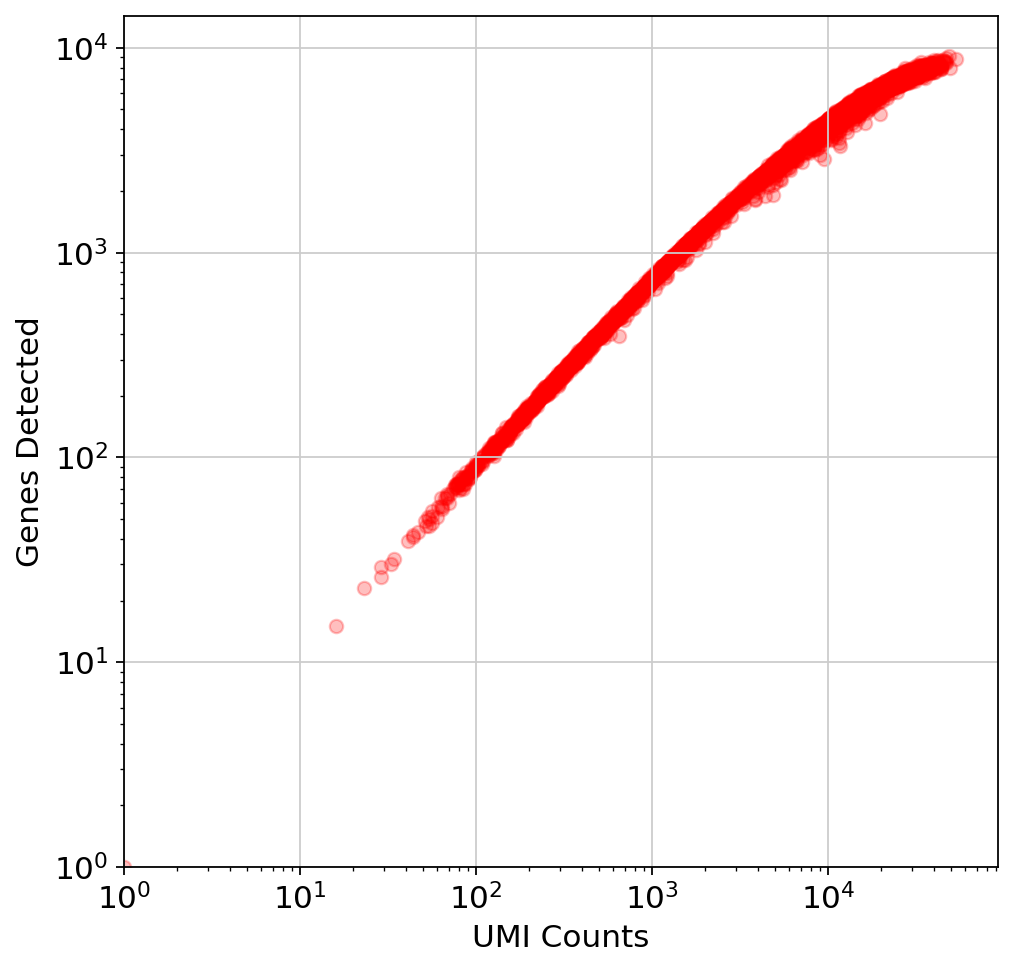

In [38]:
fig, ax=plt.subplots(figsize=(7,7))
x=np.asarray(adata.X.sum(axis=1))[:,0]
y=np.asarray(np.sum(adata.X>0, axis=1))[:,0]
ax.scatter(x,y, color="red", alpha=0.25)
ax.set_xlabel("UMI Counts")
ax.set_ylabel("Genes Detected")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1)
ax.set_ylim(1)
plt.show()

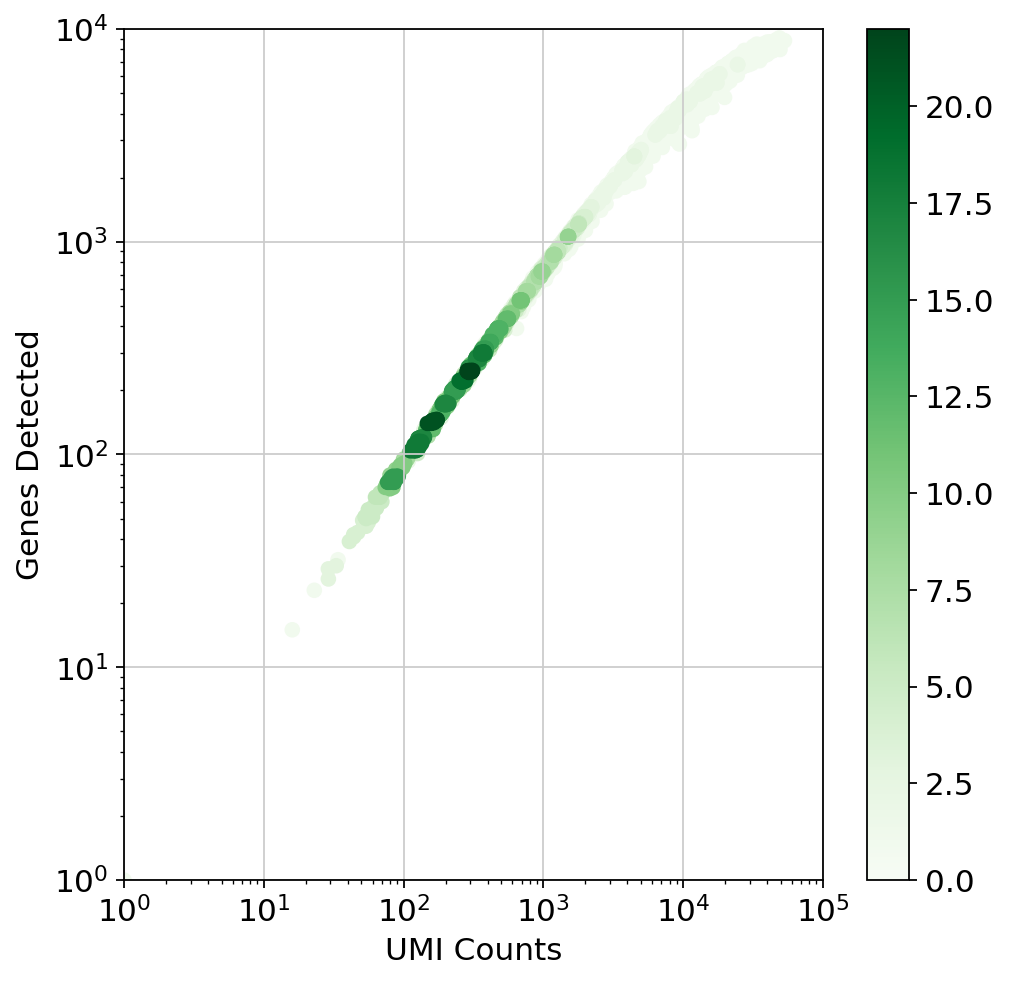

In [43]:
fig, ax=plt.subplots(figsize=(7,7))
bins=[1500, 1500]
hh, locx, locy=np.histogram2d(x,y, bins=bins)
z=np.array([hh[np.argmax(a<=locx[1:]), np.argmax(b<=locy[1:])]for a,b in zip(x,y)])
idx=z.argsort()
x2,y2,z2=x[idx], y[idx], z[idx]

s=ax.scatter(x2,y2, c=z2, cmap="Greens")
fig.colorbar(s, ax=ax)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("UMI Counts")
ax.set_ylabel("Genes Detected")
ax.set_xlim(1, 10**5)
ax.set_ylim(1, 10**4)
plt.show()

In [44]:
#The abovementioned step was to sort the points by density

In [45]:
#The next step is to examine the knee plot

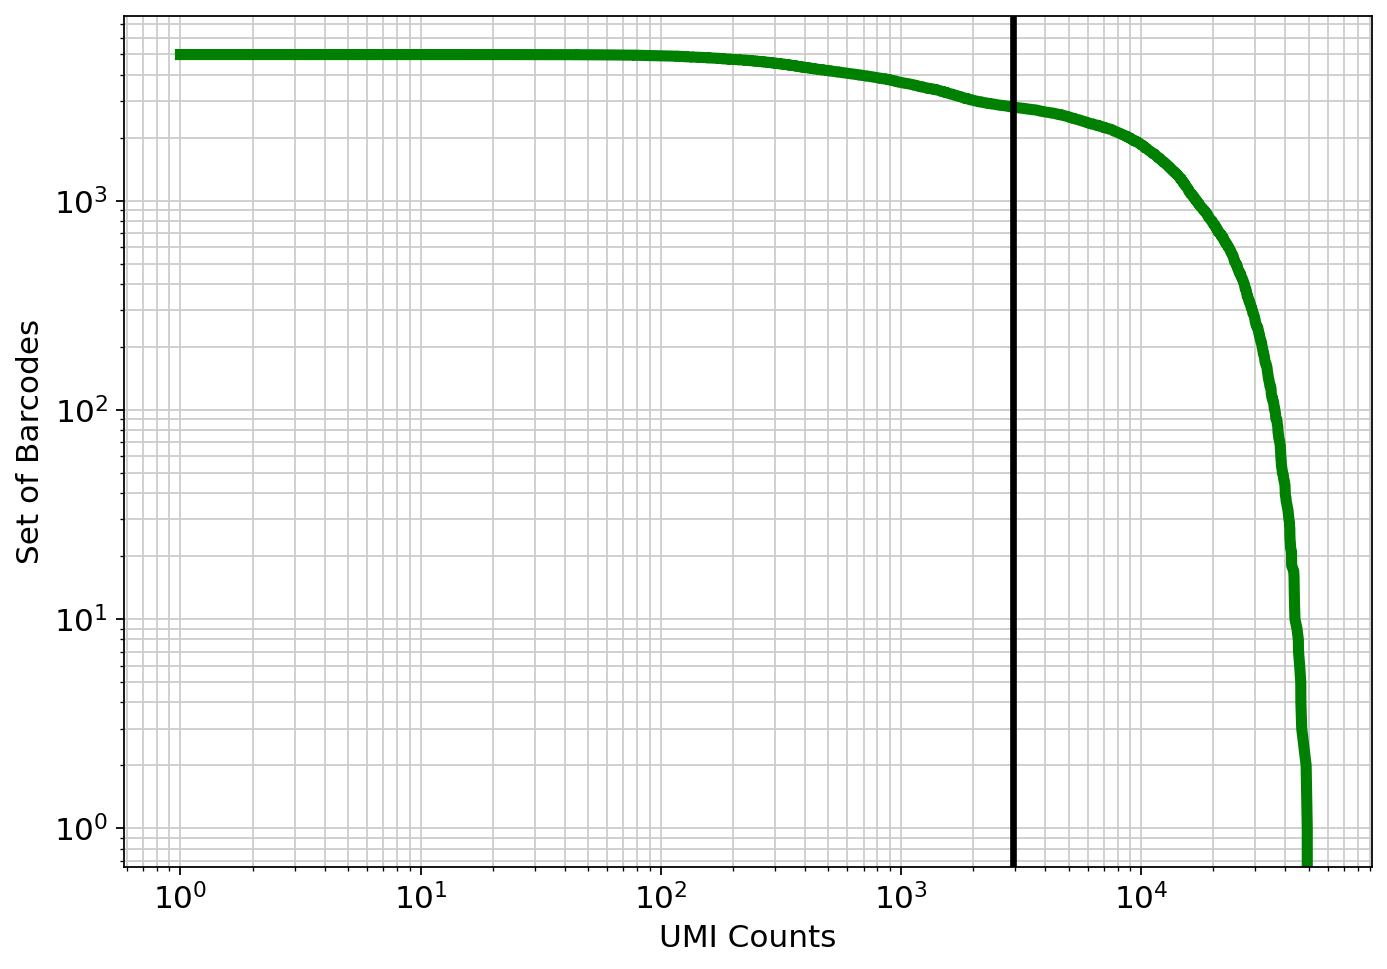

In [51]:
expected_num_cells=2800#@param{type:"integer"}
knee=np.sort((np.array(adata.X.sum(axis=1))).flatten())[::-1]
fig, ax=plt.subplots(figsize=(10,7))
ax.loglog(knee, range(len(knee)), linewidth=5, color="g")
ax.axvline(x=knee[expected_num_cells], linewidth=3, color="k")
ax.set_xlabel("UMI Counts")
ax.set_ylabel("Set of Barcodes")
plt.grid(True, which="both")
plt.show()